In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.options.display.max_rows = 999
pd.options.display.max_columns = 30

#dataframes
ls = pd.read_csv('listings.csv')
nb = pd.read_csv('neighbourhoods.csv')
rs = pd.read_csv('reviews.csv')
cl = pd.read_csv('calendar.csv')

In [100]:
#rename column from lisitng id to id
listing = listing.rename(columns={'id':'listing_id'})

In [135]:
listing.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [136]:
rev.columns

Index(['listing_id', 'date'], dtype='object')

In [137]:
cal.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [140]:
#join dataframes together
df = pd.merge(listing, rev,
how='inner', on='listing_id')
df

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2015-01-09
1,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2015-03-24
2,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2015-04-19
3,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2015-04-30
4,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2015-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330386,43375448,Amazing 2/2 on MICHIGAN AVE with optional Parking,31424769,Max,Near South Side,41.85563,-87.62471,Entire home/apt,550,2,2,2020-05-21,2.00,21,178,2020-05-11
330387,43375448,Amazing 2/2 on MICHIGAN AVE with optional Parking,31424769,Max,Near South Side,41.85563,-87.62471,Entire home/apt,550,2,2,2020-05-21,2.00,21,178,2020-05-21
330388,43383992,Michigan avenue Unique 2Br/2Ba w Optional Parking,31424769,Max,Near South Side,41.85421,-87.62535,Entire home/apt,545,2,1,2020-05-10,1.00,21,179,2020-05-10
330389,43405578,Amazing apartment on MICHIGAN AVE/optional Par...,31424769,Max,Near South Side,41.85513,-87.62459,Entire home/apt,450,2,1,2020-05-17,1.00,21,180,2020-05-17


In [141]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'date'],
      dtype='object')

In [143]:
# df.drop('neighbourhood_group', axis=1, inplace=True)

# listing.drop('longitude', axis = 1, inplace= True)
# listing.drop('latitude', axis = 1, inplace=True)

In [170]:
df = pd.merge(listing, cal, how = 'inner', on='listing_id')
df = df
df

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price_x,minimum_nights_x,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2020-06-19,f,$70.00,$70.00,2.0,1125.0
1,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2020-06-20,f,$70.00,$70.00,2.0,1125.0
2,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2020-06-21,f,$70.00,$70.00,2.0,1125.0
3,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2020-06-22,f,$70.00,$70.00,2.0,1125.0
4,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316,2020-06-23,f,$70.00,$70.00,2.0,1125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687960,43518441,Private Bedroom Close to O’hare (2C),128265803,Victor,Norwood Park,41.99605,-87.79207,Private room,26,1,0,NaN,NaN,5,363,2021-06-14,f,$27.00,$27.00,1.0,180.0
2687961,43518441,Private Bedroom Close to O’hare (2C),128265803,Victor,Norwood Park,41.99605,-87.79207,Private room,26,1,0,NaN,NaN,5,363,2021-06-15,f,$27.00,$27.00,1.0,180.0
2687962,43518441,Private Bedroom Close to O’hare (2C),128265803,Victor,Norwood Park,41.99605,-87.79207,Private room,26,1,0,NaN,NaN,5,363,2021-06-16,f,$27.00,$27.00,1.0,180.0
2687963,43518441,Private Bedroom Close to O’hare (2C),128265803,Victor,Norwood Park,41.99605,-87.79207,Private room,26,1,0,NaN,NaN,5,363,2021-06-17,f,$27.00,$27.00,1.0,180.0


In [171]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price_x', 'minimum_nights_x',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'date',
       'available', 'price_y', 'adjusted_price', 'minimum_nights_y',
       'maximum_nights'],
      dtype='object')

In [9]:
# roomtypecount = listing.groupby(['room_type', 'neighbourhood'])['room_type'].value_counts()
# room_mask = roomtypecount > 10
# room = roomtypecount[room_mask]
# room

In [11]:
#Which room type is most popular overall?

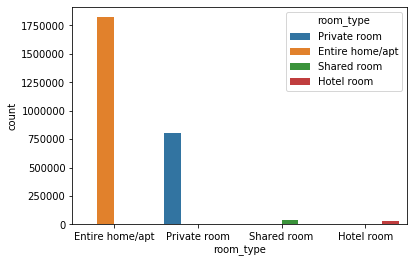

In [146]:
a = sns.countplot(x=df['room_type'], hue=df['room_type'], order = df['room_type'].value_counts().index)

In [175]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price_x', 'minimum_nights_x',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'date',
       'available', 'price_y', 'adjusted_price', 'minimum_nights_y',
       'maximum_nights'],
      dtype='object')

In [178]:
#avg pricing by room types?
mean_roomtype = df.groupby('room_type')
mean_roomtype = mean_roomtype.mean()
mean_roomtype = mean_roomtype.sort_values('price_x', ascending = False)
mean_roomtype

,listing_id,host_id,latitude,longitude,price_x,minimum_nights_x,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,minimum_nights_y,maximum_nights
room_type,,,,,,,,,,,,
Hotel room,2.536831e+07,8.267733e+07,41.908286,-87.643875,263.500000,2.121622,43.364865,2.379508,13.337838,140.351351,1.179045,6.189267e+02
Entire home/apt,2.799505e+07,9.491682e+07,41.901578,-87.661620,187.966942,7.682379,41.001425,1.962159,18.834709,171.113613,37.536521,8.616086e+02
Private room,2.595349e+07,9.385635e+07,41.890659,-87.667661,116.086295,4.162846,45.375851,1.821938,8.084270,156.621479,4.943546,1.107023e+07
Shared room,2.369619e+07,9.673183e+07,41.899720,-87.661221,44.438095,3.685714,26.047619,0.886292,9.495238,150.495238,4.062257,6.597524e+02


In [180]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price_x', 'minimum_nights_x',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'date',
       'available', 'price_y', 'adjusted_price', 'minimum_nights_y',
       'maximum_nights'],
      dtype='object')

In [182]:
#Who is the most popular host?
group_host = listing.groupby('host_name')
group_host = group_host['calculated_host_listings_count'].count()
group_host = group_host.sort_values(ascending = False)
group_host.head(10)

host_name
Blueground            220
Sonder                 98
John                   84
Natalia                81
Rob                    81
Joe                    76
Michael                74
David                  68
Corp Condos & Apts     62
Kasa                   61
Name: calculated_host_listings_count, dtype: int64

In [164]:
#what kind of properties do these top 10 hosts have?
host_room = listing.groupby(['host_id','host_name','room_type'])
host_room = host_room['calculated_host_listings_count'].count()
host_room = host_room.sort_values(ascending = False)
host_room.head(10)

host_id    host_name           room_type      
107434423  Blueground          Entire home/apt    220
12243051   Sonder              Entire home/apt     92
55976787   Natalia             Private room        80
3965428    Rob                 Entire home/apt     75
8534462    Corp Condos & Apts  Entire home/apt     62
47172572   Zencity             Entire home/apt     61
88566861   Kasa                Entire home/apt     61
229095817  Loftium             Entire home/apt     44
99375151   Marina              Private room        39
11129557   Rent Local          Entire home/apt     35
Name: calculated_host_listings_count, dtype: int64

In [124]:
#which neighborhoods are the top ten located in?
hostname = listing.groupby(['neighbourhood','host_name'])
hostname = hostname['host_name'].value_counts()
hostname = hostname.sort_values(ascending = False)
hostname.head(10)

neighbourhood    host_name           host_name         
Loop             Blueground          Blueground            86
Near West Side   Natalia             Natalia               73
Near North Side  Blueground          Blueground            71
                 Corp Condos & Apts  Corp Condos & Apts    62
Near West Side   Blueground          Blueground            46
                 Marina              Marina                42
Near North Side  Rob                 Rob                   35
Loop             Kasa                Kasa                  33
Lake View        Nicole              Nicole                29
Near North Side  Kasa                Kasa                  28
Name: host_name, dtype: int64

In [111]:
#availability of these top ten thorughout the year
avail = listing.groupby(['host_id','host_name','availability_365'])
avail
# = avail['host_name'].count()
# avail = avail.sort_values(ascending = False)
# avail

In [125]:
listing.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [117]:
# sns.pairplot(listing)

In [116]:
pricing_min_night = listing.groupby(['minimum_nights', 'price'])
pricing_min_night = listing[]